In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [21]:
# Training Data.
X = np.array([1.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

tf.reduce_mean(
	input_tensor, 
	axis=None, 
	keep_dims=False, 
	name=None, 
	reduction_indices=None
)

m = np.array([(1,7,4),(2,3,9)])
n=tf.reduce_mean(m,axis=0)
print(m,n)

In [44]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

最后，一般在网络中使用时，不需要显式调用watch函数，使用默认设置，GradientTape会监控可训练变量，例如：

with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
gradients = tape.gradient(loss, model.trainable_variables)

这样即可计算出所有可训练变量的梯度，然后进行下一步的更新。对于TensorFlow 2.0，推荐大家使用这种方式计算梯度，并且可以在eager模式下查看具体的梯度值。


In [23]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [24]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.377880, W: 0.395823, b: -0.224335
step: 100, loss: 0.325633, W: 0.373390, b: -0.064296
step: 150, loss: 0.286425, W: 0.353956, b: 0.074344
step: 200, loss: 0.257001, W: 0.337120, b: 0.194446
step: 250, loss: 0.234920, W: 0.322536, b: 0.298488
step: 300, loss: 0.218349, W: 0.309902, b: 0.388619
step: 350, loss: 0.205913, W: 0.298957, b: 0.466698
step: 400, loss: 0.196581, W: 0.289476, b: 0.534336
step: 450, loss: 0.189578, W: 0.281262, b: 0.592931
step: 500, loss: 0.184322, W: 0.274147, b: 0.643690
step: 550, loss: 0.180378, W: 0.267983, b: 0.687663
step: 600, loss: 0.177418, W: 0.262643, b: 0.725755
step: 650, loss: 0.175196, W: 0.258018, b: 0.758754
step: 700, loss: 0.173529, W: 0.254011, b: 0.787341
step: 750, loss: 0.172278, W: 0.250539, b: 0.812105
step: 800, loss: 0.171340, W: 0.247532, b: 0.833558
step: 850, loss: 0.170635, W: 0.244927, b: 0.852142
step: 900, loss: 0.170106, W: 0.242670, b: 0.868241
step: 950, loss: 0.169710, W: 0.240715, b: 0.882188
step: 1000,

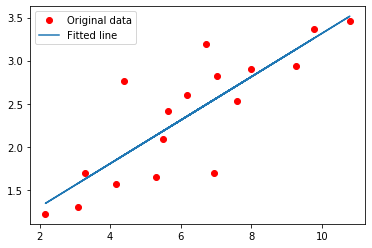

In [11]:
import matplotlib.pyplot as plt
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

二、使用keras实现线性回归更加简单

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
X = np.array([1.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [56]:
data=pd.DataFrame(np.vstack((X,Y))).T # 两个array合并后转秩，才能得到一个df
data.rename(columns={0:'data_input',1:'data_output'},inplace=True) # 队列名重命名
print(data)

    data_input  data_output
0        1.300        1.700
1        4.400        2.760
2        5.500        2.090
3        6.710        3.190
4        6.930        1.694
5        4.168        1.573
6        9.779        3.366
7        6.182        2.596
8        7.590        2.530
9        2.167        1.221
10       7.042        2.827
11      10.791        3.465
12       5.313        1.650
13       7.997        2.904
14       5.654        2.420
15       9.270        2.940
16       3.100        1.300


df = pd.DataFrame(np.random.randint(70,100,(3,5)), 
                  index=["地区1", "地区2", "地区3"], 
                  columns=["北京","天津", "上海","沈阳", "广州"])

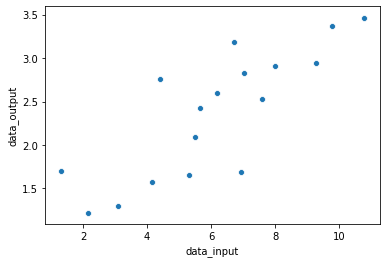

In [58]:
sns.scatterplot(x="data_input",y="data_output",data=data)

In [60]:
model=tf.keras.Sequential()

In [61]:
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer="adam",loss="mse")

In [72]:
history=model.fit(x,y,epochs=500)

Train on 17 samples
Epoch 1/500
17/17 [==============================] - 0s 310us/sample - loss: 0.1715
Epoch 2/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1715
Epoch 3/500
17/17 [==============================] - 0s 179us/sample - loss: 0.1715
Epoch 4/500
17/17 [==============================] - 0s 148us/sample - loss: 0.1715
Epoch 5/500
17/17 [==============================] - 0s 132us/sample - loss: 0.1715
Epoch 6/500
17/17 [==============================] - 0s 142us/sample - loss: 0.1715
Epoch 7/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1715
Epoch 8/500
17/17 [==============================] - 0s 123us/sample - loss: 0.1715
Epoch 9/500
17/17 [==============================] - 0s 137us/sample - loss: 0.1715
Epoch 10/500
17/17 [==============================] - 0s 159us/sample - loss: 0.1715
Epoch 11/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1714
Epoch 12/500
17/17 [==============================] - 

Epoch 98/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1708
Epoch 99/500
17/17 [==============================] - 0s 92us/sample - loss: 0.1708
Epoch 100/500
17/17 [==============================] - 0s 124us/sample - loss: 0.1708
Epoch 101/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1708
Epoch 102/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1708
Epoch 103/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1708
Epoch 104/500
17/17 [==============================] - 0s 105us/sample - loss: 0.1708
Epoch 105/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1708
Epoch 106/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1708
Epoch 107/500
17/17 [==============================] - 0s 86us/sample - loss: 0.1708
Epoch 108/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1708
Epoch 109/500
17/17 [==============================] - 0s 117u

Epoch 194/500
17/17 [==============================] - 0s 46us/sample - loss: 0.1703
Epoch 195/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1703
Epoch 196/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1703
Epoch 197/500
17/17 [==============================] - 0s 88us/sample - loss: 0.1703
Epoch 198/500
17/17 [==============================] - 0s 128us/sample - loss: 0.1702
Epoch 199/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1702
Epoch 200/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1702
Epoch 201/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1702
Epoch 202/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1702
Epoch 203/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1702
Epoch 204/500
17/17 [==============================] - 0s 234us/sample - loss: 0.1702
Epoch 205/500
17/17 [==============================] - 0s 176u

Epoch 290/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1698
Epoch 291/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1698
Epoch 292/500
17/17 [==============================] - 0s 141us/sample - loss: 0.1698
Epoch 293/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1698
Epoch 294/500
17/17 [==============================] - 0s 159us/sample - loss: 0.1698
Epoch 295/500
17/17 [==============================] - 0s 157us/sample - loss: 0.1698
Epoch 296/500
17/17 [==============================] - 0s 118us/sample - loss: 0.1698
Epoch 297/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1698
Epoch 298/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1698
Epoch 299/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1698
Epoch 300/500
17/17 [==============================] - 0s 118us/sample - loss: 0.1698
Epoch 301/500
17/17 [==============================] - 0

Epoch 386/500
17/17 [==============================] - 0s 154us/sample - loss: 0.1695
Epoch 387/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1695
Epoch 388/500
17/17 [==============================] - 0s 118us/sample - loss: 0.1695
Epoch 389/500
17/17 [==============================] - 0s 137us/sample - loss: 0.1695
Epoch 390/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1695
Epoch 391/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1695
Epoch 392/500
17/17 [==============================] - 0s 57us/sample - loss: 0.1695
Epoch 393/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1695
Epoch 394/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1695
Epoch 395/500
17/17 [==============================] - 0s 327us/sample - loss: 0.1695
Epoch 396/500
17/17 [==============================] - 0s 176us/sample - loss: 0.1695
Epoch 397/500
17/17 [==============================] - 0

Epoch 482/500
17/17 [==============================] - 0s 102us/sample - loss: 0.1692
Epoch 483/500
17/17 [==============================] - 0s 114us/sample - loss: 0.1692
Epoch 484/500
17/17 [==============================] - 0s 118us/sample - loss: 0.1692
Epoch 485/500
17/17 [==============================] - 0s 206us/sample - loss: 0.1692
Epoch 486/500
17/17 [==============================] - 0s 161us/sample - loss: 0.1692
Epoch 487/500
17/17 [==============================] - 0s 176us/sample - loss: 0.1692
Epoch 488/500
17/17 [==============================] - 0s 59us/sample - loss: 0.1692
Epoch 489/500
17/17 [==============================] - 0s 117us/sample - loss: 0.1692
Epoch 490/500
17/17 [==============================] - 0s 150us/sample - loss: 0.1692
Epoch 491/500
17/17 [==============================] - 0s 176us/sample - loss: 0.1692
Epoch 492/500
17/17 [==============================] - 0s 177us/sample - loss: 0.1692
Epoch 493/500
17/17 [==============================] - 

In [77]:
data_predict=model.predict(data.data_input)

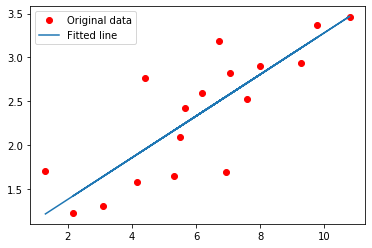

In [78]:
plt.plot(data.data_input,data.data_output, 'ro', label='Original data')
plt.plot(data.data_input, data_predict, label='Fitted line')
plt.legend()
plt.show()